<a href="https://colab.research.google.com/github/MateusVidotti/Projeto-integrador-4/blob/main/projeto_integrador_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTAR BIBLIOTECAS


In [ ]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

ESPECIFICAR CAMINHOS


In [ ]:
pasta = '/content/drive/MyDrive/imagens_celulas_1000/'

positivas = os.listdir(pasta +'positivos/')

negativas = os.listdir(pasta +'negativos/')

ALIMENTAR DATASET


In [ ]:
dataset = list()

label = list()

SIZE = 64

for i, image_name in enumerate(positivas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'positivos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

for i, image_name in enumerate(negativas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'negativos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)

/tmp/ipython-input-2672005983.py:10: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image, 'RGB')
/tmp/ipython-input-2672005983.py:18: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  image = Image.fromarray(image, 'RGB')


VERIFICAÇÃO DE IMAGEM


label =  0
imagem


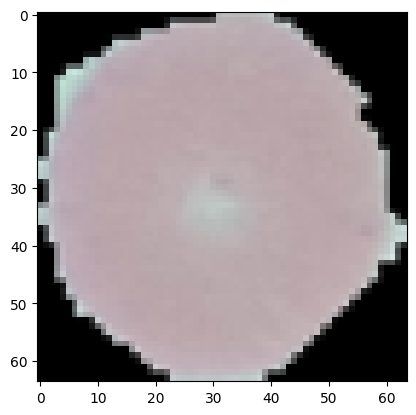

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[-1])

print('imagem')
plt.imshow(dataset[-1])

DIVIDIR O DATASET EM DADOS DE TESTE E TREINAMENTO


In [ ]:
X = np.array(dataset)

X = X/255.0

y = tf.keras.utils.to_categorical(np.array(label))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
print(np.shape(X_train))

print(np.shape(y_train))

(1600, 64, 64, 3)
(1600, 2)


DESENVOLVIMENTO DE ARQUITETURA

In [ ]:
TAM = (SIZE, SIZE, 3)

inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)

conv3 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv3)
drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)


flat = tf.keras.layers.Flatten()(drop3)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop4  = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop4)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation= 'sigmoid')(drop5)

model = tf.keras.Model(inputs = inp, outputs = out)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,322 (4.58 MB)

 Trainable params: 1,200,322 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

DADOS DE TREINAMENTO

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 31, validation_split = 0.1 )

Epoch 1/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - accuracy: 0.4959 - loss: 0.7058 - val_accuracy: 0.4688 - val_loss: 0.6921
Epoch 2/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5885 - loss: 0.6695 - val_accuracy: 0.6375 - val_loss: 0.6428
Epoch 3/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6475 - loss: 0.6328 - val_accuracy: 0.5750 - val_loss: 0.6590
Epoch 4/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6054 - loss: 0.6514 - val_accuracy: 0.7188 - val_loss: 0.5723
Epoch 5/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7084 - loss: 0.5682 - val_accuracy: 0.7688 - val_loss: 0.5644
Epoch 6/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6823 - loss: 0.5668 - val_accuracy: 0.6438 - val_loss: 0.5746
Epoch 7/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7254 - loss: 0.5674 - val_accuracy: 0.7312 - val_loss: 0.5246
Epoch 8/31
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7302 - loss: 0.5135 - val_accuracy: 0.6313 -

CRIAÇÃO DE GRÁFICOS

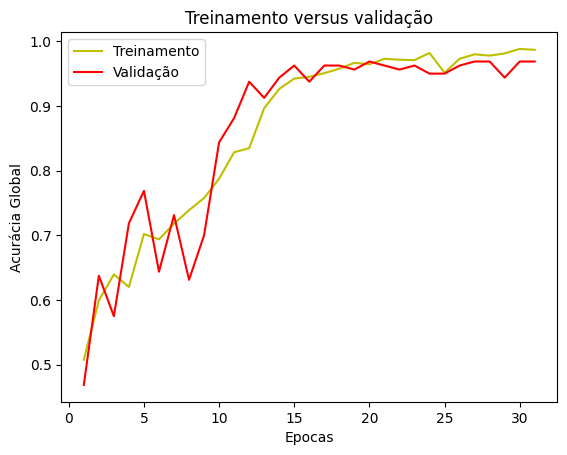

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Acurácia Global")
plt.legend()
plt.show()

DESENVOLVIMENTO DE MODELO

In [ ]:
model.save('my_model_malaria.h5')

ABERTURA DO MODELO

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('my_model_malaria.h5')

AVALIAÇÃO DOS DADOS DE TESTE

In [ ]:
_,score = model.evaluate(X_test, y_test)

print(score)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9594 - loss: 0.1270
0.9574999809265137
